In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["Dates"])

# train["Dates"].dt.year # (year/month/day/hour/minute/second)

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
test = pd.read_csv("data/test.csv", parse_dates=["Dates"])

print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


## Preprocessing

### Parse Dates

In [14]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


In [15]:
test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)
test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(884262, 13)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-10 23:59:00,2015,5,10,23,59,0
1,2015-05-10 23:51:00,2015,5,10,23,51,0
2,2015-05-10 23:50:00,2015,5,10,23,50,0
3,2015-05-10 23:45:00,2015,5,10,23,45,0
4,2015-05-10 23:45:00,2015,5,10,23,45,0


In [16]:
%matplotlib inline
import seaborn as sns

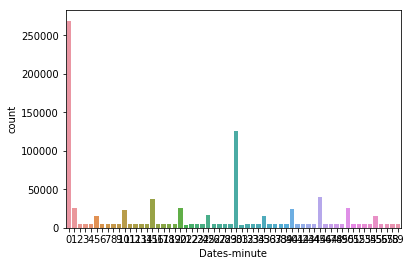

In [17]:
sns.countplot(data=train, x="Dates-minute")

In [26]:
import numpy as np

train["Dates-minute-abs"] = np.abs(train["Dates-minute"] - 30)

print(train.shape)
train[["Dates-minute", "Dates-minute-abs"]].head(10)

(878049, 16)


,Dates-minute,Dates-minute-abs
0,53,23
1,53,23
2,33,3
3,30,0
4,30,0
5,30,0
6,30,0
7,30,0
8,0,30
9,0,30


In [27]:
test["Dates-minute-abs"] = np.abs(test["Dates-minute"] - 30)

print(test.shape)
test[["Dates-minute", "Dates-minute-abs"]].head(10)

(884262, 14)


,Dates-minute,Dates-minute-abs
0,59,29
1,51,21
2,50,20
3,45,15
4,45,15
5,40,10
6,30,0
7,30,0
8,10,20
9,10,20


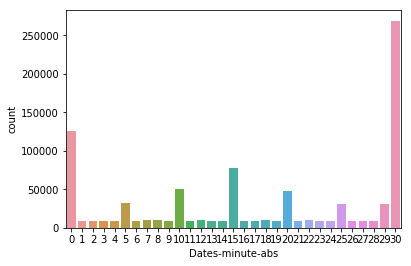

In [28]:
sns.countplot(data=train, x="Dates-minute-abs")

### Encode PdDistrict

In [49]:
pd_district_list = train["PdDistrict"].unique()

pd_district_new_column_list = []

for pd_district in pd_district_list:    
    pd_district_new_column = "PdDistrict-{0}".format(pd_district)
    train[pd_district_new_column] = train["PdDistrict"] == pd_district
    
    pd_district_new_column_list.append(pd_district_new_column)

print(train.shape)
train[pd_district_new_column_list].head()

(878049, 26)


,PdDistrict-NORTHERN,PdDistrict-PARK,PdDistrict-INGLESIDE,PdDistrict-BAYVIEW,PdDistrict-RICHMOND,PdDistrict-CENTRAL,PdDistrict-TARAVAL,PdDistrict-TENDERLOIN,PdDistrict-MISSION,PdDistrict-SOUTHERN
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False


In [50]:
for pd_district in pd_district_list:    
    pd_district_new_column = "PdDistrict-{0}".format(pd_district)
    test[pd_district_new_column] = test["PdDistrict"] == pd_district

print(test.shape)
test[pd_district_new_column_list].head()

(884262, 24)


,PdDistrict-NORTHERN,PdDistrict-PARK,PdDistrict-INGLESIDE,PdDistrict-BAYVIEW,PdDistrict-RICHMOND,PdDistrict-CENTRAL,PdDistrict-TARAVAL,PdDistrict-TENDERLOIN,PdDistrict-MISSION,PdDistrict-SOUTHERN
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False


### Parse Address

In [57]:
train["CrossRoad"] = train["Address"].str.contains("/")

print(train.shape)
train[["Address", "CrossRoad"]].head()

(878049, 27)


,Address,CrossRoad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [58]:
test["CrossRoad"] = test["Address"].str.contains("/")

print(test.shape)
test[["Address", "CrossRoad"]].head()

(884262, 25)


,Address,CrossRoad
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


## Score

In [59]:
feature_names = ["X", "Y", "CrossRoad"]
feature_names = feature_names + pd_district_new_column_list
feature_names = feature_names + ["Dates-hour", "Dates-minute-abs"]
feature_names

['X',
 'Y',
 'CrossRoad',
 'PdDistrict-NORTHERN',
 'PdDistrict-PARK',
 'PdDistrict-INGLESIDE',
 'PdDistrict-BAYVIEW',
 'PdDistrict-RICHMOND',
 'PdDistrict-CENTRAL',
 'PdDistrict-TARAVAL',
 'PdDistrict-TENDERLOIN',
 'PdDistrict-MISSION',
 'PdDistrict-SOUTHERN',
 'Dates-hour',
 'Dates-minute-abs']

In [60]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(878049, 15)


,X,Y,CrossRoad,PdDistrict-NORTHERN,PdDistrict-PARK,PdDistrict-INGLESIDE,PdDistrict-BAYVIEW,PdDistrict-RICHMOND,PdDistrict-CENTRAL,PdDistrict-TARAVAL,PdDistrict-TENDERLOIN,PdDistrict-MISSION,PdDistrict-SOUTHERN,Dates-hour,Dates-minute-abs
0,-122.425892,37.774599,True,True,False,False,False,False,False,False,False,False,False,23,23
1,-122.425892,37.774599,True,True,False,False,False,False,False,False,False,False,False,23,23
2,-122.424363,37.800414,True,True,False,False,False,False,False,False,False,False,False,23,3
3,-122.426995,37.800873,False,True,False,False,False,False,False,False,False,False,False,23,0
4,-122.438738,37.771541,False,False,True,False,False,False,False,False,False,False,False,23,0


In [61]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(884262, 15)


,X,Y,CrossRoad,PdDistrict-NORTHERN,PdDistrict-PARK,PdDistrict-INGLESIDE,PdDistrict-BAYVIEW,PdDistrict-RICHMOND,PdDistrict-CENTRAL,PdDistrict-TARAVAL,PdDistrict-TENDERLOIN,PdDistrict-MISSION,PdDistrict-SOUTHERN,Dates-hour,Dates-minute-abs
0,-122.399588,37.735051,False,False,False,False,True,False,False,False,False,False,False,23,29
1,-122.391523,37.732432,True,False,False,False,True,False,False,False,False,False,False,23,21
2,-122.426002,37.792212,False,True,False,False,False,False,False,False,False,False,False,23,20
3,-122.437394,37.721412,False,False,False,True,False,False,False,False,False,False,False,23,15
4,-122.437394,37.721412,False,False,False,True,False,False,False,False,False,False,False,23,15


In [62]:
label_name = "Category"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(878049,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### Use Random Forest

### XGBoost

In [63]:
import xgboost as xgb
# https://github.com/dmlc/xgboost/blob/master/doc/parameter.md

model = xgb.XGBClassifier(n_estimators=15,
                          nthread=-1,
                          seed=37)
model

/home/dsschool/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=15, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=37, silent=True, subsample=1)

In [64]:
from sklearn.model_selection import cross_val_score

%time score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_log_loss').mean()

print("Score = {0:.5f}".format(score))

CPU times: user 22min 51s, sys: 968 ms, total: 22min 52s
Wall time: 3min 5s
Score = -2.71042


** 주의: 시간이 오래 걸리므로 마지막에 한 번만 돌릴 것**

In [65]:
import xgboost as xgb

# https://github.com/dmlc/xgboost/blob/master/doc/parameter.md

model = xgb.XGBClassifier(n_estimators=45,
                          max_depth=6,
                          learning_rate=1.0,
                          max_delta_step=1,
                          nthread=-1,
                          seed=37)
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1.0, max_delta_step=1, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=45, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=37, silent=True, subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score

%time score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_log_loss').mean()

print("Score = {0:.5f}".format(score))

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict_proba(X_test)

print(predictions.shape)
predictions[0]

## Submit

In [ ]:
submit = pd.read_csv("data/sampleSubmission.csv", index_col="Id")

print(submit.shape)
submit.head()

In [ ]:
for i, column in enumerate(submit.columns):
    submit[column] = predictions[:, i]

print(submit.shape)
submit.head()

In [ ]:
submit.to_csv("baseline-script.csv")